## Final Project Submission

Please fill out:
* Student name: Pamela Jepkorir Chebii
* Student pace: Part time
* Scheduled project review date/time: 03-06-2024
* Instructor name: Samuel Karu
* Blog post URL:


**PART ONE: DATA UNDERSTANDING**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

PART ONE: ANALYSING DATA IN THE im.db DATABASE

- Code to open up a connection to the SQLite database and store the connection in a variable called `conn`
- Initialize a SQLite cursor object with the variable name `cursor`.

In [2]:
import os
import sqlite3
sql_movie_data = os.path.join('im.db')
conn = sqlite3.connect(sql_movie_data)
cursor = conn.cursor()

In [3]:
# code to display all the tables in the im.db database
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


read data from movie_basics table to understand the entire data

In [4]:
q1 = """
    SELECT * FROM movie_basics; """
pd.read_sql(q1, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
q2 = """
    SELECT * FROM movie_ratings; 
    
    """
pd.read_sql(q2, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
q3 = """
    SELECT DISTINCT genres FROM movie_basics;
    """
pd.read_sql(q3, conn)

,genres
0,"Action,Crime,Drama"
1,"Biography,Drama"
2,Drama
3,"Comedy,Drama"
4,"Comedy,Drama,Fantasy"
...,...
1081,"History,Reality-TV,War"
1082,"Mystery,Reality-TV,Thriller"
1083,"Music,Musical,Reality-TV"
1084,"Animation,Crime"


PART TWO: ANALYSING bom.movie_cross.csv data

In [13]:
# Code to read the bom.movie_gross.csv file and display the first 10 rows
bom_movie_gross = pd.read_csv("bom.movie_gross.csv")
bom_movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [8]:
year_counts = bom_movie_gross['year'].value_counts()
year_counts

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [9]:

year_frequency_percentage = year_counts.max() / sum(year_counts.values)
year_frequency_percentage

0.1328609388839681

In [10]:
min_year = year_counts.min() / sum(year_counts.values)
min_year

0.09093593150280484

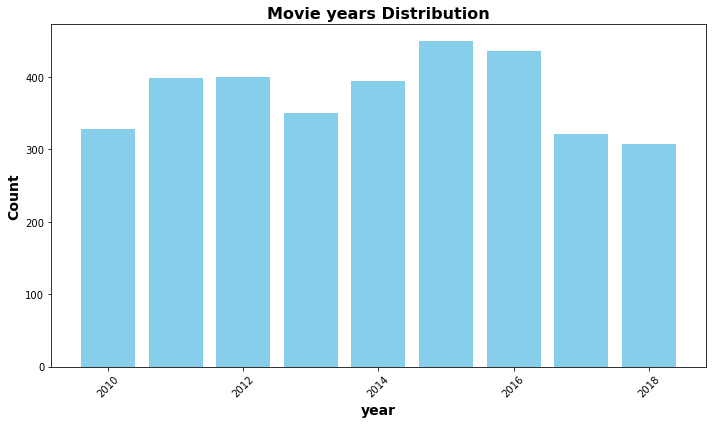

In [11]:
# plot graph for year against the number of movies
# plot a bar graph graph for movie ratings against value counts

bom_movie_gross = bom_movie_gross['year'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(bom_movie_gross.index, bom_movie_gross.values, color='skyblue')

plt.title('Movie years Distribution', fontsize=16, fontweight='bold')
plt.xlabel('year', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()



In [14]:
# code that gives information about the data
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
'''
The bom_movie data has 3387 rows and five columns
The foreign_gross column and studio column has some missing values

'''

In [15]:
#Dealing with missing values in the foreign_gross column
bom_movie_gross['foreign_gross'].isna().sum()

1350

In [16]:
#Percentage of missing data in the foreig_gross column

missing = bom_movie_gross['foreign_gross'].isna().sum()
missing_percent = missing / len(bom_movie_gross)
missing_percent


0.3985828166519043

In [ ]:
'''
39% of data in the foreign_gross is missing which means that 39% of the data are sold locally only 
whereare 61% are sold both locally and internationally
'''

In [17]:
# code to display the different studios that produces movies and their numbers

studios = bom_movie_gross['studio'].value_counts()
studios

IFC             166
Uni.            147
WB              140
Magn.           136
Fox             136
               ... 
Darin Southa      1
EF                1
Blue Fox          1
RLJ               1
IVP               1
Name: studio, Length: 257, dtype: int64

In [ ]:
"""
The total number of studios in the dataset is 257 with IFC producing the highest number of movies at 166
"""

In [18]:
# top ten studios producing highest number of movies
studios = bom_movie_gross['studio'].value_counts()
studios.head(10)

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

In [19]:
studio_counts = bom_movie_gross['studio'].value_counts()
top_10_studios = studio_counts.head(10).index.to_list()
top_10_studios

['IFC', 'Uni.', 'WB', 'Magn.', 'Fox', 'SPC', 'Sony', 'BV', 'LGF', 'Par.']

Creating a matplotlib figure `movie_count_figure` containing a labeled bar chart with the number of movies from the first ten studios

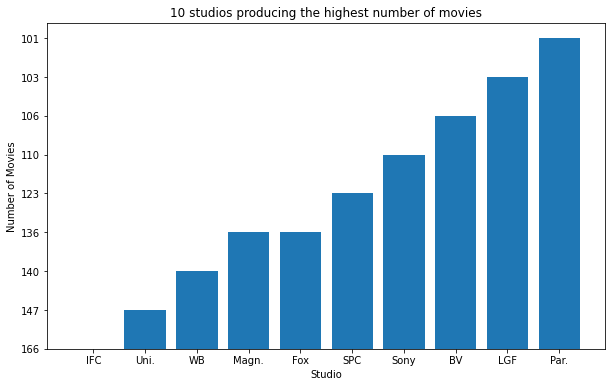

In [20]:
bar_chart_title = '10 studios producing the highest number of movies'
bar_chart_count_label = 'Number of Movies'
bar_chart_series_label = 'Studio'
studio_counts_tot = ['166', '147', '140','136', '136', '123', '110', '106', '103', '101']
# YOUR CODE HERE
player_count_figure, ax = plt.subplots(figsize=(10, 6))
plt.bar(top_10_studios, studio_counts_tot)
plt.xlabel(bar_chart_series_label)
plt.ylabel(bar_chart_count_label)
plt.title(bar_chart_title)
plt.show()

In [21]:
#Check whether there are any missing values in the dataset
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

PART THREE: ANALYSING data from rt.movie_info.tsv

In [22]:
# Your code here - remember to use markdown cells for comments as well!
movie_info = pd.read_csv("rt.movie_info.tsv", delimiter='\t', index_col=0)
movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [23]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [ ]:
"""
The movie dataset has a total of 1560 rows with eleven datasets. All the columns are of object data type.
The only column that doesn't have missing values is the runtime column with the rating column having the
least missing values at 3.
"""

In [24]:
#code to check the different values of the rating column
movie_info.rating.unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [25]:
# code to check the missing vallues and count the number
movie_info.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [26]:
#code to check value counts for the rating column
movie_info.rating.value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

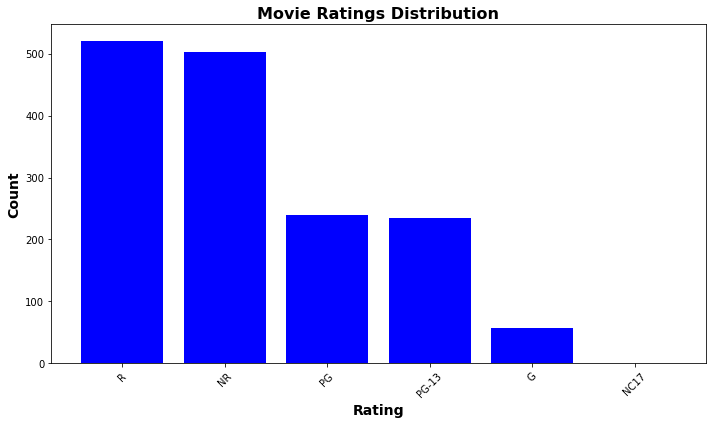

In [27]:
# plot a bar graph graph for movie ratings against value counts

rating_counts = movie_info['rating'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='blue')

plt.title('Movie Ratings Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [ ]:
"""
From the above graph graph we can see that the movie for "R" rating is the most preferred with the movie 
for "NC17" being the least preffered movie type.
"""

In [28]:
# code to delete the missing rows in the rating column
movie_info.dropna(subset=['rating'], inplace=True)
movie_info.isna().sum()


synopsis          59
rating             0
genre              5
director         196
writer           446
theater_date     356
dvd_date         356
currency        1217
box_office      1217
runtime           27
studio          1063
dtype: int64

PART FOUR: ANALYSING DATA from tmdb.movies.csv

In [29]:
movie_data_tmd = pd.read_csv("tmdb.movies.csv", index_col=0)
movie_data_tmd.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [30]:
movie_data_tmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [48]:
#code to check the different languages that the movies were originally written in
movie_data_tmd["original_language"].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [31]:
# code to count the distribution of languages
movie_data_tmd.original_language.value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
yi        1
ky        1
hz        1
af        1
cy        1
Name: original_language, Length: 76, dtype: int64

In [32]:
#code to check whether there is any missing data
movie_data_tmd.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [ ]:
"""
The data is clean
There are no missing values in the data
"""

In [33]:
movie_data_tmd.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


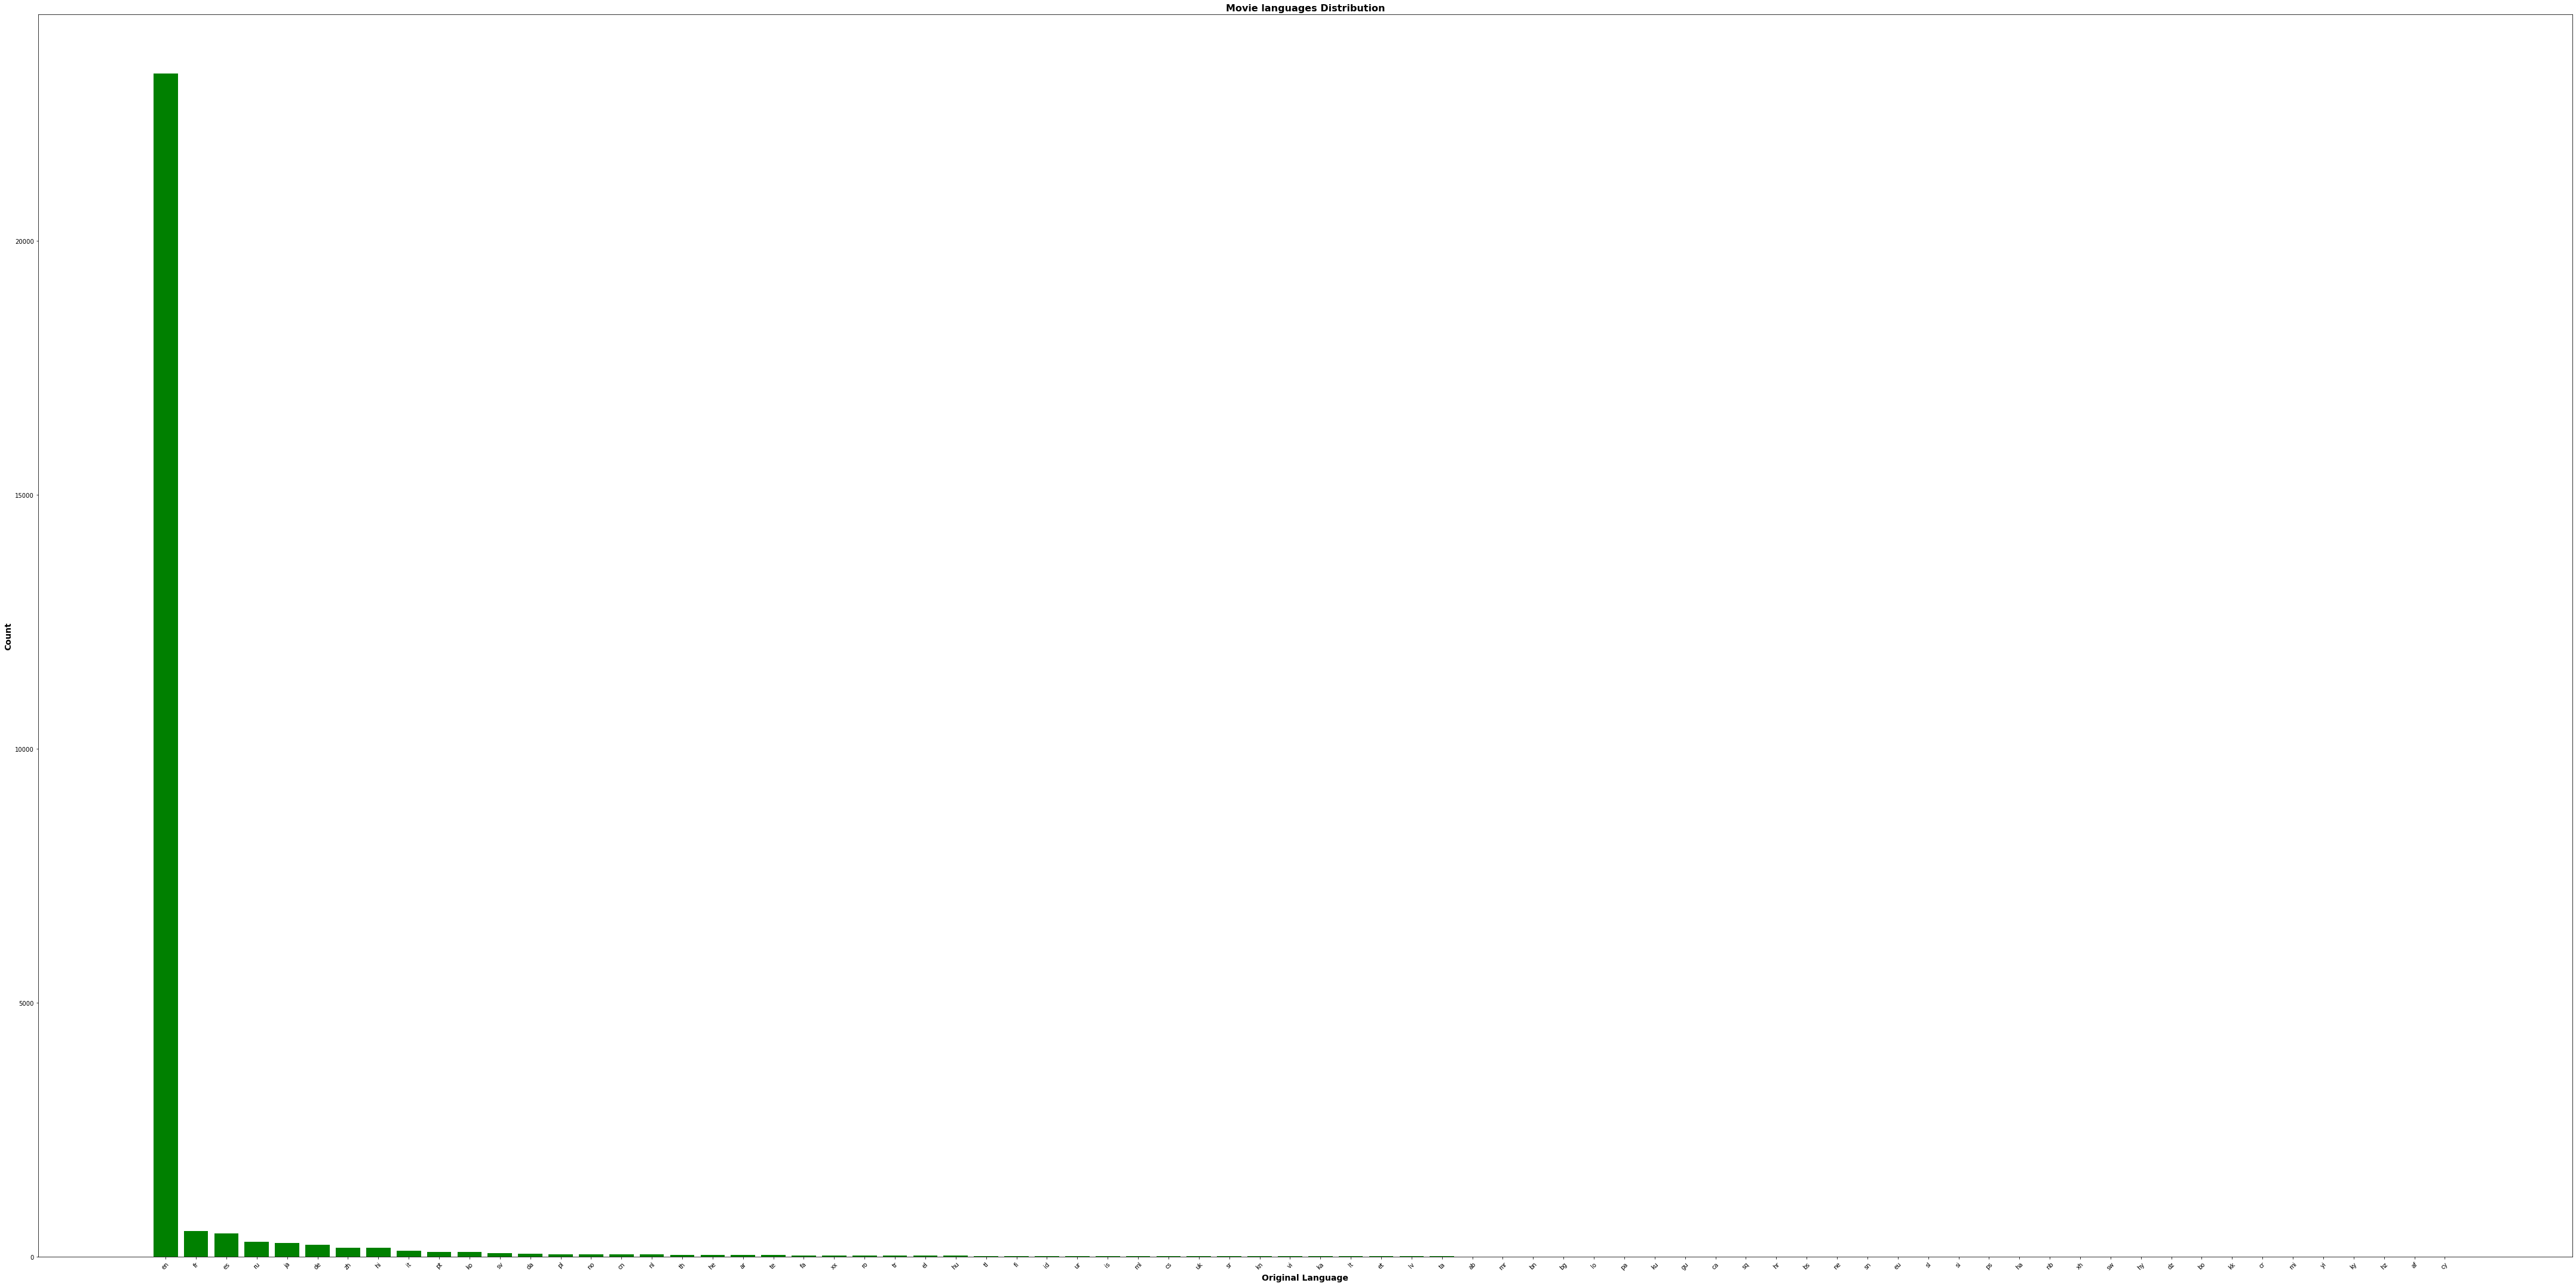

In [34]:
# plot a bar graph graph for movie ratings against value counts

language_counts = movie_data_tmd['original_language'].value_counts()

# Create a bar chart
plt.figure(figsize=(60,30))
plt.bar(language_counts.index, language_counts.values, color='green')

plt.title('Movie languages Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Original Language', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [35]:
#The percentage of movies produced in English Language
percentage = language_counts.max() / sum(language_counts.values)
percentage

0.8783421955726515

In [ ]:
"""
Most of the movies are produced in english having a percentage of 87.8%
"""

In [36]:
tn_movie_budgets = pd.read_csv("tn.movie_budgets.csv")
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [37]:
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [38]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [40]:
movie_reviews = pd.read_csv("rt.reviews.tsv", delimiter='\t', encoding='unicode_escape')
movie_reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [41]:
movie_reviews["publisher"].value_counts()

eFilmCritic.com              673
EmanuelLevy.Com              591
New York Times               590
Washington Post              565
Entertainment Weekly         541
                            ... 
Movies in Focus                1
Weekly Planet (Tampa, FL)      1
Phindie                        1
Reuters                        1
Dare Daniel                    1
Name: publisher, Length: 1281, dtype: int64

In [42]:
movie_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [43]:
movie_reviews.top_critic.value_counts()

0    41336
1    13096
Name: top_critic, dtype: int64

In [44]:
movie_reviews.shape

(54432, 8)

In [45]:
movie_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [46]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
